# R-curve (Concept)

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import ipywidgets as ipw

<img src="Equivalent Elastic Crack Concept.png" width="800"/>

In [2]:
f_1 = sp.Symbol('f_1', nonnegative = True)
f_2 = sp.Symbol('f_2', nonnegative = True)
E = sp.Symbol('E', nonnegative = True)
alpha = sp.Symbol('alpha', nonnegative = True)
a_0 = sp.Symbol('a_0', nonnegative = True)
a_c = sp.Symbol('a_c', nonnegative = True)
pi = sp.Symbol(r'\pi', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
P = sp.Symbol('P', nonnegative = True)
S = sp.Symbol('S', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
COD = sp.Symbol('COD', nonnegative = True)
K_Ic = sp.Symbol('K_{Ic}', nonnegative = True)

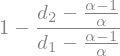

In [3]:
d_1 = sp.Symbol('d_1')
d_2 = sp.Symbol('d_2')
psi = 1 - ((d_2 - (alpha - 1)/alpha)/(d_1 - (alpha - 1)/alpha)) * \
        ((alpha * a_0 - a_0)/(alpha * a_0 - a_0))**(d_2 - d_1)
psi

In [4]:
params = {f_2 : 1.42, 
          E: 20000, #N/mm2
          P_max : 10, #N 
          D : 19, #mm
          H_0 : 3, #mm
          B : 76.2, #mm
          S : 304.8, #mm
          P : 120, #N
          pi : 3.14, 
          #a_0: 10, #mm
          f_1: 1.123,
          #COD : 0.0094, ##mm
          K_Ic : 31.4 #N/mm2
         }

In [5]:
sigma_x = (P * S) / B**2
sigma_x_ = sigma_x.subs(params)
sigma_x_

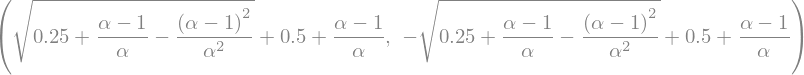

In [6]:
alpha_ = sp.Symbol(r'\alpha')
d_1 = (1/2) + ((alpha_ - 1) / alpha_) + sp.sqrt(1/4 + (alpha_ - 1) / alpha_\
                                                            - ((alpha_ - 1) / alpha_)**2)
d_2 = (1/2) + ((alpha_ - 1) / alpha_) - sp.sqrt(1/4 + (alpha_ - 1) / alpha_ \
                                                            - ((alpha_ - 1) / alpha_)**2)
d_1, d_2

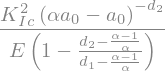

In [7]:
K_Ic = sp.Symbol('K_Ic')
alpha_ = sp.Symbol(r'\alpha')
a_0_ = sp.Symbol(r'a_0')
d_2 = sp.Symbol(r'd_2')
E = sp.Symbol(r'E')
d_1 = sp.Symbol(r'd_1')
beta_2 = (K_Ic**2 * (alpha_ * a_0_ - a_0_)**(-d_2)) / (E * (1 - (d_2 - ((alpha_-1)/alpha_))\
                                                            /(d_1 - ((alpha_-1)/alpha_))))
beta_2

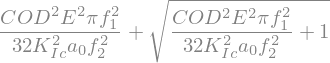

In [8]:
f_1 = sp.Symbol('f_1', nonnegative = True)
f_2 = sp.Symbol('f_2', nonnegative = True)
E = sp.Symbol('E', nonnegative = True)
a_0 = sp.Symbol('a_0', nonnegative = True)
pi = sp.Symbol(r'\pi', nonnegative = True)
COD_ = sp.Symbol('COD', nonnegative = True)
K_Ic = sp.Symbol('K_{Ic}', nonnegative = True)
alpha_ = (pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
        + sp.sqrt((pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) + 1)
alpha_

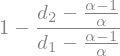

In [9]:
a_0_ = sp.Symbol(r'a_0')
d_2 = sp.Symbol(r'd_2')
E = sp.Symbol(r'E')
d_1 = sp.Symbol(r'd_1')
alpha_ = sp.Symbol(r'\alpha')
psi = 1 - ((d_2 - (alpha_ - 1)/alpha_)/(d_1 - (alpha_ - 1)/alpha_)\
              ) * ((alpha_ * a_0_ - a_0_)/(alpha_ * a_0_ - a_0_))**(d_2 - d_1) 
psi

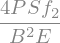

In [10]:
CMOD = (4 * sigma_x * f_2) / E
CMOD

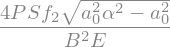

In [11]:
COD = CMOD * sp.sqrt((alpha * a_0)**2 - a_0**2)
COD_ = COD#.subs(params)
COD_

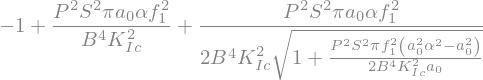

In [12]:
alpha_ = (pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
        + sp.sqrt((pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) + 1)
#alpha_sim = sp.simplify(alpha_.subs(params))
alpha_val = alpha_ - alpha
alpha_diff = alpha_val.diff(alpha)
#alpha_val
alpha_diff

## Impact of Critical Stress Intensity Factor on R-curve

In [13]:
K_Ic_val = np.linspace(30,90,5)
alpha_0 = 1
d_1 = np.zeros((100,5))
d_2 = np.zeros((100,5))
beta_2 = np.zeros((100,5))
psi = np.zeros((100,5))
alpha_ans = np.zeros((100,5))
COD = np.zeros((100,5))
R = np.zeros((100,5))
R_c = np.zeros((5,1))
a_c = np.zeros((5,1))
for i, K_Ic_ in enumerate(K_Ic_val):
    a_01 = np.linspace(10, 40, 100)
    for j, a in enumerate(a_01):
        if a == 10:
            R[j, i] = 0
        elif a > 10:
            alpha_ans = 1
        params = {
              E : 20000, #N/mm2,
              f_2 : 1.42, 
              E: 20000, #N/mm2
              B : 76.2, #mm
              S : 304.8, #mm
              P : 120, #N
              pi : 3.14, 
              a_0: 10, #mm
              f_1: 1.123}
        CMOD = (4 * sigma_x_ * f_2.subs(params)) / E.subs(params)
        alpha_ = (pi * E**2 * f_1**2 * (CMOD * sp.sqrt((alpha * a_0)**2 \
            - a_0**2))**2) / (32 * a_0 * K_Ic_**2 * f_2**2) \
             + sp.sqrt((pi * E**2 * f_1**2 * (CMOD * sp.sqrt((alpha * a_0)**2 - a_0**2))**2) \
                   / (32 * a_0 * K_Ic_**2 * f_2**2)+ 1)
        alpha_val = alpha_.subs(params) - alpha
        alpha_diff = alpha_val.diff(alpha)
        alpha_n = alpha_0 - (alpha_val/alpha_diff)
        alpha_sol = sp.solve(alpha_n, alpha)
        #print('*************')
        #print('a = ', j, a)
        #print('K_Ic =', i, K_Ic_)
        #print('alpha_sol=', alpha_sol)
        if alpha_sol[0] > 1:
            alpha_ans = alpha_sol[0]
        elif alpha_sol[0] < 1:
            alpha_ans = alpha_sol[1]
        #print('alpha =', alpha_ans)
        d_1 = (1/2) + ((alpha_ans - 1) /  alpha_ans) + sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans\
                                            - (( alpha_ans - 1) /  alpha_ans)**2)
        #print('d_1 =', d_1)
        d_2 = (1/2) + (( alpha_ans - 1) /  alpha_ans) - sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans \
                                         - (( alpha_ans - 1) /  alpha_ans)**2)
        #print('d_2 = ', d_2)
        beta_2 = (K_Ic_**2 * ( alpha_ans * a_0.subs(params) - a_0.subs(params))**(-d_2)) / (E.subs(params) * (1 - (d_2 \
                                                        - (( alpha_ans-1)/ alpha_ans))\
                                                         /(d_1 - (( alpha_ans-1)/ alpha_ans))))
        psi = 1 - ((d_2 - ( alpha_ans - 1) /  alpha_ans)/(d_1  - ( alpha_ans - 1) /  alpha_ans))\
            *  ((alpha_ans * a_0.subs(params) - a_0.subs(params))/(alpha_ans * a_0.subs(params) \
              - a_0.subs(params)))**(d_2 - d_1)
        #print('beta =', beta_2)
        R[j, i] = beta_2 * psi * (a - a_0.subs(params))**d_2
        R_c[i] = ((K_Ic_)**2 / E.subs(params))
        a_c[i] = alpha_ans * a_0.subs(params)
        if R[j, i] <= ((K_Ic_)**2 / E.subs(params)):
            R[j, i] = beta_2 * psi * (a - a_0.subs(params))**d_2
        else:
                R[j, i] = ((K_Ic_)**2 / E.subs(params))
        #print('R =',[i, j], R[j, i])
        #print('*************')
    print('R =',R)
    print('R_c = ', R_c)
    print('a_c =', a_c)
    #i +=1
    

R = [[0.         0.         0.         0.         0.        ]
 [0.01006316 0.         0.         0.         0.        ]
 [0.01316987 0.         0.         0.         0.        ]
 [0.01541462 0.         0.         0.         0.        ]
 [0.01723569 0.         0.         0.         0.        ]
 [0.01879512 0.         0.         0.         0.        ]
 [0.02017344 0.         0.         0.         0.        ]
 [0.02141735 0.         0.         0.         0.        ]
 [0.02255671 0.         0.         0.         0.        ]
 [0.02361191 0.         0.         0.         0.        ]
 [0.02459757 0.         0.         0.         0.        ]
 [0.02552461 0.         0.         0.         0.        ]
 [0.0264014  0.         0.         0.         0.        ]
 [0.02723455 0.         0.         0.         0.        ]
 [0.02802935 0.         0.         0.         0.        ]
 [0.02879012 0.         0.         0.         0.        ]
 [0.02952045 0.         0.         0.         0.        ]
 [0.030223

R = [[0.         0.         0.         0.         0.        ]
 [0.01006316 0.01647065 0.13004405 0.         0.        ]
 [0.01316987 0.0224411  0.14156711 0.         0.        ]
 [0.01541462 0.02689205 0.14877537 0.         0.        ]
 [0.01723569 0.03057576 0.15411121 0.         0.        ]
 [0.01879512 0.03377714 0.15838146 0.         0.        ]
 [0.02017344 0.03664014 0.16195819 0.         0.        ]
 [0.02141735 0.03924929 0.16504521 0.         0.        ]
 [0.02255671 0.04165915 0.16776684 0.         0.        ]
 [0.02361191 0.04390733 0.17020471 0.         0.        ]
 [0.02459757 0.046021   0.17241546 0.         0.        ]
 [0.02552461 0.04802057 0.17444006 0.         0.        ]
 [0.0264014  0.04992181 0.17630912 0.         0.        ]
 [0.02723455 0.05173718 0.17804617 0.         0.        ]
 [0.02802935 0.05347675 0.17966968 0.         0.        ]
 [0.02879012 0.05514878 0.18       0.         0.        ]
 [0.02952045 0.05676016 0.18       0.         0.        ]
 [0.030223

R = [[0.         0.         0.         0.         0.        ]
 [0.01006316 0.01647065 0.13004405 0.14479223 0.18096488]
 [0.01316987 0.0224411  0.14156711 0.16761321 0.21438332]
 [0.01541462 0.02689205 0.14877537 0.18259557 0.236724  ]
 [0.01723569 0.03057576 0.15411121 0.19403106 0.25397308]
 [0.01879512 0.03377714 0.15838146 0.20339205 0.26821343]
 [0.02017344 0.03664014 0.16195819 0.21137481 0.28043937]
 [0.02141735 0.03924929 0.16504521 0.21836808 0.29121003]
 [0.02255671 0.04165915 0.16776684 0.22461268 0.3008738 ]
 [0.02361191 0.04390733 0.17020471 0.23026886 0.30966369]
 [0.02459757 0.046021   0.17241546 0.23544907 0.3177439 ]
 [0.02552461 0.04802057 0.17444006 0.24023546 0.32523481]
 [0.0264014  0.04992181 0.17630912 0.24469001 0.33222758]
 [0.02723455 0.05173718 0.17804617 0.2488607  0.33879299]
 [0.02802935 0.05347675 0.17966968 0.25278551 0.34498723]
 [0.02879012 0.05514878 0.18       0.25649503 0.35085569]
 [0.02952045 0.05676016 0.18       0.26001432 0.35643559]
 [0.030223

In [14]:
_, (ax1) = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(a_01, R[:,0], color='red', lw=2, label = (r'$K_{Ic} = 30\,N/(mm)^{3/2}$'))
ax1.plot(a_01, R[:,1], color='blue', lw=2, label = (r'$K_{Ic} = 45\,N/(mm)^{3/2}$'))
ax1.plot(a_01, R[:,2], color='green', lw=2, label = (r'$K_{Ic} = 60\,N/(mm)^{3/2}$'))
ax1.plot(a_01, R[:,3], color='orange', lw=2, label = (r'$K_{Ic} = 75\,N/(mm)^{3/2}$'))
ax1.plot(a_01, R[:,4], color='black', lw=2, label = (r'$K_{Ic} = 90\,N/(mm)^{3/2}$'))
#ax1.annotate(a_c[:,0], R_c[:,0], color='black', label = ('$R_{Ic}$') )
#ax1.plot(a_0_val, R_c, color='orange', lw=2, label = (r'R_c'))
ax1.set_xlabel('a'); ax1.set_ylabel('R')
ax1.legend()
_.savefig("R_K_Ic.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

## Impact of Modulus of Elasticity on R-curve

In [15]:
K_Ic = sp.Symbol('K_{Ic}', nonengative = True)

In [16]:
E_val = np.linspace(20000,40000,3)
alpha_0 = 1
d_1 = np.zeros((100,3))
d_2 = np.zeros((100,3))
beta_2 = np.zeros((100,3))
psi = np.zeros((100,3))
alpha_ans = np.zeros((100,3))
COD = np.zeros((100,3))
R = np.zeros((100,3))
R_c = np.zeros((3,1))
a_c = np.zeros((3,1))
for i, E_ in enumerate(E_val):
    a_01 = np.linspace(10, 40, 100)
    for j, a in enumerate(a_01):
        if a == 10:
            R[j, i] = 0
        elif a > 10:
            alpha_ans = 1
        params = {
              K_Ic : 30, #N/mm(3/2),
              f_2 : 1.42, 
              #E: 20000, #N/mm2
              B : 76.2, #mm
              S : 304.8, #mm
              P : 120, #N
              pi : 3.14, 
              a_0: 10, #mm
              f_1: 1.123}
        CMOD = (4 * sigma_x_ * f_2.subs(params)) / E_
        alpha_ = (pi * E_**2 * f_1**2 * (CMOD * sp.sqrt((alpha * a_0)**2 \
            - a_0**2))**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
             + sp.sqrt((pi * E_**2 * f_1**2 * (CMOD * sp.sqrt((alpha * a_0)**2 - a_0**2))**2) \
                   / (32 * a_0 *  K_Ic**2 * f_2**2)+ 1)
        alpha_val = alpha_.subs(params) - alpha
        alpha_diff = alpha_val.diff(alpha)
        alpha_n = alpha_0 - (alpha_val/alpha_diff)
        alpha_sol = sp.solve(alpha_n, alpha)
        #print('*************')
        #print('a = ', j, a)
        #print('E =', i, E_)
        #print('alpha_sol=', alpha_sol)
        if alpha_sol[0] > 1:
            alpha_ans = alpha_sol[0]
        elif alpha_sol[0] < 1:
            alpha_ans = alpha_sol[1]
        #print('alpha =', alpha_ans)
        d_1 = (1/2) + ((alpha_ans - 1) /  alpha_ans) + sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans\
                                            - (( alpha_ans - 1) /  alpha_ans)**2)
        #print('d_1 =', d_1)
        d_2 = (1/2) + (( alpha_ans - 1) /  alpha_ans) - sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans \
                                         - (( alpha_ans - 1) /  alpha_ans)**2)
        #print('d_2 = ', d_2)
        beta_2 = (K_Ic.subs(params)**2 * ( alpha_ans * a_0.subs(params) - a_0.subs(params))**(-d_2)) / (E_ * (1 - (d_2 \
                                                        - (( alpha_ans-1)/ alpha_ans))\
                                                         /(d_1 - (( alpha_ans-1)/ alpha_ans))))
        psi = 1 - ((d_2 - ( alpha_ans - 1) /  alpha_ans)/(d_1  - ( alpha_ans - 1) /  alpha_ans))\
            *  ((alpha_ans * a_0.subs(params) - a_0.subs(params))/(alpha_ans * a_0.subs(params) \
              - a_0.subs(params)))**(d_2 - d_1)
        #print('beta =', beta_2)
        R[j, i] = beta_2 * psi * (a - a_0.subs(params))**d_2
        R_c[i] = ((K_Ic.subs(params))**2 / E_)
        a_c[i] = alpha_ans * a_0.subs(params)
        if R[j, i] <= ((K_Ic.subs(params))**2 / E_):
            R[j, i] = beta_2 * psi * (a - a_0.subs(params))**d_2
        else:
                R[j, i] = ((K_Ic.subs(params))**2 / E_)
        #print('R =',[i, j], R[j, i])
        #print('*************')
    print('R =',R)
    #i +=1    

R = [[0.         0.         0.        ]
 [0.01006316 0.         0.        ]
 [0.01316987 0.         0.        ]
 [0.01541462 0.         0.        ]
 [0.01723569 0.         0.        ]
 [0.01879512 0.         0.        ]
 [0.02017344 0.         0.        ]
 [0.02141735 0.         0.        ]
 [0.02255671 0.         0.        ]
 [0.02361191 0.         0.        ]
 [0.02459757 0.         0.        ]
 [0.02552461 0.         0.        ]
 [0.0264014  0.         0.        ]
 [0.02723455 0.         0.        ]
 [0.02802935 0.         0.        ]
 [0.02879012 0.         0.        ]
 [0.02952045 0.         0.        ]
 [0.03022336 0.         0.        ]
 [0.03090141 0.         0.        ]
 [0.03155678 0.         0.        ]
 [0.03219136 0.         0.        ]
 [0.03280682 0.         0.        ]
 [0.0334046  0.         0.        ]
 [0.03398597 0.         0.        ]
 [0.03455208 0.         0.        ]
 [0.03510393 0.         0.        ]
 [0.03564244 0.         0.        ]
 [0.03616841 0.         

In [17]:
_, (ax1) = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(a_01, R[:,0], color='red', lw=2, label = (r'$E = 20000\,MPa$'))
ax1.plot(a_01, R[:,1], color='blue', lw=2, label = (r'$E = 30000\,MPa$'))
ax1.plot(a_01, R[:,2], color='green', lw=2, label = (r'$E = 40000\,MPa$'))
#ax1.plot(a_0_val, R_c, color='orange', lw=2, label = (r'R_c'))
ax1.set_xlabel('a'); ax1.set_ylabel('R')
ax1.legend()
_.savefig("R_E.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

## Impact of Normalized Applied load $\sigma$ on R-curve

In [ ]:
sigma_val = np.linspace(1,10,10)
alpha_0 = 1
d_1 = np.zeros((100,10))
d_2 = np.zeros((100,10))
beta_2 = np.zeros((100,10))
psi = np.zeros((100,10))
alpha_ans = np.zeros((100,10))
COD = np.zeros((100,10))
R = np.zeros((100,10))
R_c = np.zeros((10,1))
a_c = np.zeros((10,1))
for i, sigma_ in enumerate(sigma_val):
    a_01 = np.linspace(10, 40, 100)
    for j, a in enumerate(a_01):
        if a == 10:
            R[j, i] = 0
        elif a > 10:
            alpha_ans = 1
        params = {
              K_Ic : 30, #N/mm(3/2),
              f_2 : 1.42, 
              E: 20000, #N/mm2
              B : 76.2, #mm
              S : 304.8, #mm
              P : 120, #N
              pi : 3.14, 
              a_0: 10, #mm
              f_1: 1.123}
        CMOD = (4 * sigma_ * f_2.subs(params)) / E.subs(params)
        alpha_ = (pi * E**2 * f_1**2 * (CMOD * sp.sqrt((alpha * a_0)**2 \
            - a_0**2))**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
             + sp.sqrt((pi * E**2 * f_1**2 * (CMOD * sp.sqrt((alpha * a_0)**2 - a_0**2))**2) \
                   / (32 * a_0 * K_Ic**2 * f_2**2)+ 1)
        alpha_val = alpha_.subs(params) - alpha
        alpha_diff = alpha_val.diff(alpha)
        alpha_n = alpha_0 - (alpha_val/alpha_diff)
        alpha_sol = sp.solve(alpha_n, alpha)
        print('*************')
        print('a = ', j, a)
        print('sigma =', i, sigma_)
        print('alpha_sol=', alpha_sol)
        if alpha_sol[0] >= 1:
            alpha_ans = alpha_sol[0]
        elif alpha_sol[0] < 1:
            alpha_ans = alpha_sol[1]
        print('alpha =', alpha_ans)
        d_1 = (1/2) + ((alpha_ans - 1) /  alpha_ans) + sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans\
                                            - (( alpha_ans - 1) /  alpha_ans)**2)
        print('d_1 =', d_1)
        d_2 = (1/2) + (( alpha_ans - 1) /  alpha_ans) - sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans \
                                         - (( alpha_ans - 1) /  alpha_ans)**2)
        print('d_2 = ', d_2)
        beta_2 = (K_Ic.subs(params)**2 * ( alpha_ans * a_0.subs(params) - a_0.subs(params))**(-d_2)) / (E.subs(params) * (1 - (d_2 \
                                                        - (( alpha_ans-1)/ alpha_ans))\
                                                         /(d_1 - (( alpha_ans-1)/ alpha_ans))))
        psi = 1 - ((d_2 - ( alpha_ans - 1) /  alpha_ans)/(d_1  - ( alpha_ans - 1) /  alpha_ans))\
            *  ((alpha_ans * a_0.subs(params) - a_0.subs(params))/(alpha_ans * a_0.subs(params) \
              - a_0.subs(params)))**(d_2 - d_1)
        print('beta =', beta_2)
        R[j, i] = beta_2 * psi * (a - a_0.subs(params))**d_2
        R_c[i] = ((K_Ic.subs(params))**2 / E.subs(params))
        a_c[i] = alpha_ans * a_0.subs(params)
        if R[j, i] <= ((K_Ic.subs(params))**2 / E.subs(params)):
            R[j, i] = beta_2 * psi * (a - a_0.subs(params))**d_2
        else:
                R[j, i] = ((K_Ic.subs(params))**2 / E.subs(params))
        print('R =',[i, j], R[j, i])
        print('*************')
    print('R =',R)
    print('R_c =', R_c)
    print('a_c =', a_c)
    #i +=1 

*************
a =  0 10.0
sigma = 0 1.0
alpha_sol= [1.96558826673217, 39.6654124029385]
alpha = 1.96558826673217
d_1 = 1.69829905170739
d_2 =  0.284193856980427
beta = 0.0201643933154618
R = [0, 0] 0.0
*************
*************
a =  1 10.303030303030303
sigma = 0 1.0
alpha_sol= [1.96558826673217, 39.6654124029385]
alpha = 1.96558826673217
d_1 = 1.69829905170739
d_2 =  0.284193856980427
beta = 0.0201643933154618
R = [0, 1] 0.016826051205283975
*************
*************
a =  2 10.606060606060606
sigma = 0 1.0
alpha_sol= [1.96558826673217, 39.6654124029385]
alpha = 1.96558826673217
d_1 = 1.69829905170739
d_2 =  0.284193856980427
beta = 0.0201643933154618
R = [0, 2] 0.020489581204978524
*************
*************
a =  3 10.90909090909091
sigma = 0 1.0
alpha_sol= [1.96558826673217, 39.6654124029385]
alpha = 1.96558826673217
d_1 = 1.69829905170739
d_2 =  0.284193856980427
beta = 0.0201643933154618
R = [0, 3] 0.02299202038595381
*************
*************
a =  4 11.212121212121213
sigma

*************
a =  34 20.303030303030305
sigma = 0 1.0
alpha_sol= [1.96558826673217, 39.6654124029385]
alpha = 1.96558826673217
d_1 = 1.69829905170739
d_2 =  0.284193856980427
beta = 0.0201643933154618
R = [0, 34] 0.045
*************
*************
a =  35 20.606060606060606
sigma = 0 1.0
alpha_sol= [1.96558826673217, 39.6654124029385]
alpha = 1.96558826673217
d_1 = 1.69829905170739
d_2 =  0.284193856980427
beta = 0.0201643933154618
R = [0, 35] 0.045
*************
*************
a =  36 20.90909090909091
sigma = 0 1.0
alpha_sol= [1.96558826673217, 39.6654124029385]
alpha = 1.96558826673217
d_1 = 1.69829905170739
d_2 =  0.284193856980427
beta = 0.0201643933154618
R = [0, 36] 0.045
*************
*************
a =  37 21.21212121212121
sigma = 0 1.0
alpha_sol= [1.96558826673217, 39.6654124029385]
alpha = 1.96558826673217
d_1 = 1.69829905170739
d_2 =  0.284193856980427
beta = 0.0201643933154618
R = [0, 37] 0.045
*************
*************
a =  38 21.515151515151516
sigma = 0 1.0
alpha_sol= 

*************
a =  70 31.21212121212121
sigma = 0 1.0
alpha_sol= [1.96558826673217, 39.6654124029385]
alpha = 1.96558826673217
d_1 = 1.69829905170739
d_2 =  0.284193856980427
beta = 0.0201643933154618
R = [0, 70] 0.045
*************
*************
a =  71 31.515151515151516
sigma = 0 1.0
alpha_sol= [1.96558826673217, 39.6654124029385]
alpha = 1.96558826673217
d_1 = 1.69829905170739
d_2 =  0.284193856980427
beta = 0.0201643933154618
R = [0, 71] 0.045
*************
*************
a =  72 31.81818181818182
sigma = 0 1.0
alpha_sol= [1.96558826673217, 39.6654124029385]
alpha = 1.96558826673217
d_1 = 1.69829905170739
d_2 =  0.284193856980427
beta = 0.0201643933154618
R = [0, 72] 0.045
*************
*************
a =  73 32.121212121212125
sigma = 0 1.0
alpha_sol= [1.96558826673217, 39.6654124029385]
alpha = 1.96558826673217
d_1 = 1.69829905170739
d_2 =  0.284193856980427
beta = 0.0201643933154618
R = [0, 73] 0.045
*************
*************
a =  74 32.42424242424242
sigma = 0 1.0
alpha_sol= [

*************
a =  0 10.0
sigma = 1 2.0
alpha_sol= [1.83851106737031, 8.98228935510134]
alpha = 1.83851106737031
d_1 = 1.66182317637890
d_2 =  0.250340021604633
beta = 0.0225735487133723
R = [1, 0] 0.0
*************
*************
a =  1 10.303030303030303
sigma = 1 2.0
alpha_sol= [1.83851106737031, 8.98228935510134]
alpha = 1.83851106737031
d_1 = 1.66182317637890
d_2 =  0.250340021604633
beta = 0.0225735487133723
R = [1, 1] 0.01959821465673765
*************
*************
a =  2 10.606060606060606
sigma = 1 2.0
alpha_sol= [1.83851106737031, 8.98228935510134]
alpha = 1.83851106737031
d_1 = 1.66182317637890
d_2 =  0.250340021604633
beta = 0.0225735487133723
R = [1, 2] 0.02331182991275732
*************
*************
a =  3 10.90909090909091
sigma = 1 2.0
alpha_sol= [1.83851106737031, 8.98228935510134]
alpha = 1.83851106737031
d_1 = 1.66182317637890
d_2 =  0.250340021604633
beta = 0.0225735487133723
R = [1, 3] 0.025802337722601737
*************
*************
a =  4 11.212121212121213
sigma 

*************
a =  34 20.303030303030305
sigma = 1 2.0
alpha_sol= [1.83851106737031, 8.98228935510134]
alpha = 1.83851106737031
d_1 = 1.66182317637890
d_2 =  0.250340021604633
beta = 0.0225735487133723
R = [1, 34] 0.045
*************
*************
a =  35 20.606060606060606
sigma = 1 2.0
alpha_sol= [1.83851106737031, 8.98228935510134]
alpha = 1.83851106737031
d_1 = 1.66182317637890
d_2 =  0.250340021604633
beta = 0.0225735487133723
R = [1, 35] 0.045
*************
*************
a =  36 20.90909090909091
sigma = 1 2.0
alpha_sol= [1.83851106737031, 8.98228935510134]
alpha = 1.83851106737031
d_1 = 1.66182317637890
d_2 =  0.250340021604633
beta = 0.0225735487133723
R = [1, 36] 0.045
*************
*************
a =  37 21.21212121212121
sigma = 1 2.0
alpha_sol= [1.83851106737031, 8.98228935510134]
alpha = 1.83851106737031
d_1 = 1.66182317637890
d_2 =  0.250340021604633
beta = 0.0225735487133723
R = [1, 37] 0.045
*************
*************
a =  38 21.515151515151516
sigma = 1 2.0
alpha_sol= 

*************
a =  70 31.21212121212121
sigma = 1 2.0
alpha_sol= [1.83851106737031, 8.98228935510134]
alpha = 1.83851106737031
d_1 = 1.66182317637890
d_2 =  0.250340021604633
beta = 0.0225735487133723
R = [1, 70] 0.045
*************
*************
a =  71 31.515151515151516
sigma = 1 2.0
alpha_sol= [1.83851106737031, 8.98228935510134]
alpha = 1.83851106737031
d_1 = 1.66182317637890
d_2 =  0.250340021604633
beta = 0.0225735487133723
R = [1, 71] 0.045
*************
*************
a =  72 31.81818181818182
sigma = 1 2.0
alpha_sol= [1.83851106737031, 8.98228935510134]
alpha = 1.83851106737031
d_1 = 1.66182317637890
d_2 =  0.250340021604633
beta = 0.0225735487133723
R = [1, 72] 0.045
*************
*************
a =  73 32.121212121212125
sigma = 1 2.0
alpha_sol= [1.83851106737031, 8.98228935510134]
alpha = 1.83851106737031
d_1 = 1.66182317637890
d_2 =  0.250340021604633
beta = 0.0225735487133723
R = [1, 73] 0.045
*************
*************
a =  74 32.42424242424242
sigma = 1 2.0
alpha_sol= [

*************
a =  0 10.0
sigma = 2 3.0
alpha_sol= [1.50696148325630, 4.03324591246809]
alpha = 1.50696148325630
d_1 = 1.52433694179762
d_2 =  0.148489124281835
beta = 0.0305316041220261
R = [2, 0] 0.0
*************
*************
a =  1 10.303030303030303
sigma = 2 3.0
alpha_sol= [1.50696148325630, 4.03324591246809]
alpha = 1.50696148325630
d_1 = 1.52433694179762
d_2 =  0.148489124281835
beta = 0.0305316041220261
R = [2, 1] 0.0296167717097885
*************
*************
a =  2 10.606060606060606
sigma = 2 3.0
alpha_sol= [1.50696148325630, 4.03324591246809]
alpha = 1.50696148325630
d_1 = 1.52433694179762
d_2 =  0.148489124281835
beta = 0.0305316041220261
R = [2, 2] 0.03282746887206256
*************
*************
a =  3 10.90909090909091
sigma = 2 3.0
alpha_sol= [1.50696148325630, 4.03324591246809]
alpha = 1.50696148325630
d_1 = 1.52433694179762
d_2 =  0.148489124281835
beta = 0.0305316041220261
R = [2, 3] 0.03486462794641146
*************
*************
a =  4 11.212121212121213
sigma = 

*************
a =  35 20.606060606060606
sigma = 2 3.0
alpha_sol= [1.50696148325630, 4.03324591246809]
alpha = 1.50696148325630
d_1 = 1.52433694179762
d_2 =  0.148489124281835
beta = 0.0305316041220261
R = [2, 35] 0.045
*************
*************
a =  36 20.90909090909091
sigma = 2 3.0
alpha_sol= [1.50696148325630, 4.03324591246809]
alpha = 1.50696148325630
d_1 = 1.52433694179762
d_2 =  0.148489124281835
beta = 0.0305316041220261
R = [2, 36] 0.045
*************
*************
a =  37 21.21212121212121
sigma = 2 3.0
alpha_sol= [1.50696148325630, 4.03324591246809]
alpha = 1.50696148325630
d_1 = 1.52433694179762
d_2 =  0.148489124281835
beta = 0.0305316041220261
R = [2, 37] 0.045
*************
*************
a =  38 21.515151515151516
sigma = 2 3.0
alpha_sol= [1.50696148325630, 4.03324591246809]
alpha = 1.50696148325630
d_1 = 1.52433694179762
d_2 =  0.148489124281835
beta = 0.0305316041220261
R = [2, 38] 0.045
*************
*************
a =  39 21.81818181818182
sigma = 2 3.0
alpha_sol= [

*************
a =  71 31.515151515151516
sigma = 2 3.0
alpha_sol= [1.50696148325630, 4.03324591246809]
alpha = 1.50696148325630
d_1 = 1.52433694179762
d_2 =  0.148489124281835
beta = 0.0305316041220261
R = [2, 71] 0.045
*************
*************
a =  72 31.81818181818182
sigma = 2 3.0
alpha_sol= [1.50696148325630, 4.03324591246809]
alpha = 1.50696148325630
d_1 = 1.52433694179762
d_2 =  0.148489124281835
beta = 0.0305316041220261
R = [2, 72] 0.045
*************
*************
a =  73 32.121212121212125
sigma = 2 3.0
alpha_sol= [1.50696148325630, 4.03324591246809]
alpha = 1.50696148325630
d_1 = 1.52433694179762
d_2 =  0.148489124281835
beta = 0.0305316041220261
R = [2, 73] 0.045
*************
*************
a =  74 32.42424242424242
sigma = 2 3.0
alpha_sol= [1.50696148325630, 4.03324591246809]
alpha = 1.50696148325630
d_1 = 1.52433694179762
d_2 =  0.148489124281835
beta = 0.0305316041220261
R = [2, 74] 0.045
*************
*************
a =  75 32.72727272727273
sigma = 2 3.0
alpha_sol= [

*************
a =  0 10.0
sigma = 3 4.0
alpha_sol= [0.938636311705813, 2.86513832742437]
alpha = 2.86513832742437
d_1 = 1.84177771973496
d_2 =  0.460175703994526
beta = 0.0100906327131895
R = [3, 0] 0.0
*************
*************
a =  1 10.303030303030303
sigma = 3 4.0
alpha_sol= [0.938636311705813, 2.86513832742437]
alpha = 2.86513832742437
d_1 = 1.84177771973496
d_2 =  0.460175703994526
beta = 0.0100906327131895
R = [3, 1] 0.006758567350607426
*************
*************
a =  2 10.606060606060606
sigma = 3 4.0
alpha_sol= [0.938636311705813, 2.86513832742437]
alpha = 2.86513832742437
d_1 = 1.84177771973496
d_2 =  0.460175703994526
beta = 0.0100906327131895
R = [3, 2] 0.009297824322723615
*************
*************
a =  3 10.90909090909091
sigma = 3 4.0
alpha_sol= [0.938636311705813, 2.86513832742437]
alpha = 2.86513832742437
d_1 = 1.84177771973496
d_2 =  0.460175703994526
beta = 0.0100906327131895
R = [3, 3] 0.011205061776841729
*************
*************
a =  4 11.212121212121213


*************
a =  34 20.303030303030305
sigma = 3 4.0
alpha_sol= [0.938636311705813, 2.86513832742437]
alpha = 2.86513832742437
d_1 = 1.84177771973496
d_2 =  0.460175703994526
beta = 0.0100906327131895
R = [3, 34] 0.03424554126413248
*************
*************
a =  35 20.606060606060606
sigma = 3 4.0
alpha_sol= [0.938636311705813, 2.86513832742437]
alpha = 2.86513832742437
d_1 = 1.84177771973496
d_2 =  0.460175703994526
beta = 0.0100906327131895
R = [3, 35] 0.03470541526727401
*************
*************
a =  36 20.90909090909091
sigma = 3 4.0
alpha_sol= [0.938636311705813, 2.86513832742437]
alpha = 2.86513832742437
d_1 = 1.84177771973496
d_2 =  0.460175703994526
beta = 0.0100906327131895
R = [3, 36] 0.035158249591571045
*************
*************
a =  37 21.21212121212121
sigma = 3 4.0
alpha_sol= [0.938636311705813, 2.86513832742437]
alpha = 2.86513832742437
d_1 = 1.84177771973496
d_2 =  0.460175703994526
beta = 0.0100906327131895
R = [3, 37] 0.0356043431754989
*************
******

*************
a =  68 30.606060606060606
sigma = 3 4.0
alpha_sol= [0.938636311705813, 2.86513832742437]
alpha = 2.86513832742437
d_1 = 1.84177771973496
d_2 =  0.460175703994526
beta = 0.0100906327131895
R = [3, 68] 0.045
*************
*************
a =  69 30.90909090909091
sigma = 3 4.0
alpha_sol= [0.938636311705813, 2.86513832742437]
alpha = 2.86513832742437
d_1 = 1.84177771973496
d_2 =  0.460175703994526
beta = 0.0100906327131895
R = [3, 69] 0.045
*************
*************
a =  70 31.21212121212121
sigma = 3 4.0
alpha_sol= [0.938636311705813, 2.86513832742437]
alpha = 2.86513832742437
d_1 = 1.84177771973496
d_2 =  0.460175703994526
beta = 0.0100906327131895
R = [3, 70] 0.045
*************
*************
a =  71 31.515151515151516
sigma = 3 4.0
alpha_sol= [0.938636311705813, 2.86513832742437]
alpha = 2.86513832742437
d_1 = 1.84177771973496
d_2 =  0.460175703994526
beta = 0.0100906327131895
R = [3, 71] 0.045
*************
*************
a =  72 31.81818181818182
sigma = 3 4.0
alpha_so

*************
a =  0 10.0
sigma = 4 5.0
alpha_sol= [0.469199940579271, 2.56519338877593]
alpha = 2.56519338877593
d_1 = 1.80863809589959
d_2 =  0.411693591858900
beta = 0.0124412882166486
R = [4, 0] 0.0
*************
*************
a =  1 10.303030303030303
sigma = 4 5.0
alpha_sol= [0.469199940579271, 2.56519338877593]
alpha = 2.56519338877593
d_1 = 1.80863809589959
d_2 =  0.411693591858900
beta = 0.0124412882166486
R = [4, 1] 0.008870490902416565
*************
*************
a =  2 10.606060606060606
sigma = 4 5.0
alpha_sol= [0.469199940579271, 2.56519338877593]
alpha = 2.56519338877593
d_1 = 1.80863809589959
d_2 =  0.411693591858900
beta = 0.0124412882166486
R = [4, 2] 0.011799939346954271
*************
*************
a =  3 10.90909090909091
sigma = 4 5.0
alpha_sol= [0.469199940579271, 2.56519338877593]
alpha = 2.56519338877593
d_1 = 1.80863809589959
d_2 =  0.411693591858900
beta = 0.0124412882166486
R = [4, 3] 0.013943616125326722
*************
*************
a =  4 11.212121212121213


*************
a =  34 20.303030303030305
sigma = 4 5.0
alpha_sol= [0.469199940579271, 2.56519338877593]
alpha = 2.56519338877593
d_1 = 1.80863809589959
d_2 =  0.411693591858900
beta = 0.0124412882166486
R = [4, 34] 0.03788329195931643
*************
*************
a =  35 20.606060606060606
sigma = 4 5.0
alpha_sol= [0.469199940579271, 2.56519338877593]
alpha = 2.56519338877593
d_1 = 1.80863809589959
d_2 =  0.411693591858900
beta = 0.0124412882166486
R = [4, 35] 0.038338098959913094
*************
*************
a =  36 20.90909090909091
sigma = 4 5.0
alpha_sol= [0.469199940579271, 2.56519338877593]
alpha = 2.56519338877593
d_1 = 1.80863809589959
d_2 =  0.411693591858900
beta = 0.0124412882166486
R = [4, 36] 0.03878532378794651
*************
*************
a =  37 21.21212121212121
sigma = 4 5.0
alpha_sol= [0.469199940579271, 2.56519338877593]
alpha = 2.56519338877593
d_1 = 1.80863809589959
d_2 =  0.411693591858900
beta = 0.0124412882166486
R = [4, 37] 0.03922529833327513
*************
*****

*************
a =  68 30.606060606060606
sigma = 4 5.0
alpha_sol= [0.469199940579271, 2.56519338877593]
alpha = 2.56519338877593
d_1 = 1.80863809589959
d_2 =  0.411693591858900
beta = 0.0124412882166486
R = [4, 68] 0.045
*************
*************
a =  69 30.90909090909091
sigma = 4 5.0
alpha_sol= [0.469199940579271, 2.56519338877593]
alpha = 2.56519338877593
d_1 = 1.80863809589959
d_2 =  0.411693591858900
beta = 0.0124412882166486
R = [4, 69] 0.045
*************
*************
a =  70 31.21212121212121
sigma = 4 5.0
alpha_sol= [0.469199940579271, 2.56519338877593]
alpha = 2.56519338877593
d_1 = 1.80863809589959
d_2 =  0.411693591858900
beta = 0.0124412882166486
R = [4, 70] 0.045
*************
*************
a =  71 31.515151515151516
sigma = 4 5.0
alpha_sol= [0.469199940579271, 2.56519338877593]
alpha = 2.56519338877593
d_1 = 1.80863809589959
d_2 =  0.411693591858900
beta = 0.0124412882166486
R = [4, 71] 0.045
*************
*************
a =  72 31.81818181818182
sigma = 4 5.0
alpha_so

*************
a =  0 10.0
sigma = 5 6.0
alpha_sol= [0.167717000814521, 2.45573209423608]
alpha = 2.45573209423608
d_1 = 1.79378169408249
d_2 =  0.391797219556232
beta = 0.0134994920927931
R = [5, 0] 0.0
*************
*************
a =  1 10.303030303030303
sigma = 5 6.0
alpha_sol= [0.167717000814521, 2.45573209423608]
alpha = 2.45573209423608
d_1 = 1.79378169408249
d_2 =  0.391797219556232
beta = 0.0134994920927931
R = [5, 1] 0.009871158216246456
*************
*************
a =  2 10.606060606060606
sigma = 5 6.0
alpha_sol= [0.167717000814521, 2.45573209423608]
alpha = 2.45573209423608
d_1 = 1.79378169408249
d_2 =  0.391797219556232
beta = 0.0134994920927931
R = [5, 2] 0.012951224398007114
*************
*************
a =  3 10.90909090909091
sigma = 5 6.0
alpha_sol= [0.167717000814521, 2.45573209423608]
alpha = 2.45573209423608
d_1 = 1.79378169408249
d_2 =  0.391797219556232
beta = 0.0134994920927931
R = [5, 3] 0.015181087865120575
*************
*************
a =  4 11.212121212121213


*************
a =  34 20.303030303030305
sigma = 5 6.0
alpha_sol= [0.167717000814521, 2.45573209423608]
alpha = 2.45573209423608
d_1 = 1.79378169408249
d_2 =  0.391797219556232
beta = 0.0134994920927931
R = [5, 34] 0.0393004292966979
*************
*************
a =  35 20.606060606060606
sigma = 5 6.0
alpha_sol= [0.167717000814521, 2.45573209423608]
alpha = 2.45573209423608
d_1 = 1.79378169408249
d_2 =  0.391797219556232
beta = 0.0134994920927931
R = [5, 35] 0.03974931780220451
*************
*************
a =  36 20.90909090909091
sigma = 5 6.0
alpha_sol= [0.167717000814521, 2.45573209423608]
alpha = 2.45573209423608
d_1 = 1.79378169408249
d_2 =  0.391797219556232
beta = 0.0134994920927931
R = [5, 36] 0.04019047189571631
*************
*************
a =  37 21.21212121212121
sigma = 5 6.0
alpha_sol= [0.167717000814521, 2.45573209423608]
alpha = 2.45573209423608
d_1 = 1.79378169408249
d_2 =  0.391797219556232
beta = 0.0134994920927931
R = [5, 37] 0.04062423427748238
*************
*******

*************
a =  69 30.90909090909091
sigma = 5 6.0
alpha_sol= [0.167717000814521, 2.45573209423608]
alpha = 2.45573209423608
d_1 = 1.79378169408249
d_2 =  0.391797219556232
beta = 0.0134994920927931
R = [5, 69] 0.045
*************
*************
a =  70 31.21212121212121
sigma = 5 6.0
alpha_sol= [0.167717000814521, 2.45573209423608]
alpha = 2.45573209423608
d_1 = 1.79378169408249
d_2 =  0.391797219556232
beta = 0.0134994920927931
R = [5, 70] 0.045
*************
*************
a =  71 31.515151515151516
sigma = 5 6.0
alpha_sol= [0.167717000814521, 2.45573209423608]
alpha = 2.45573209423608
d_1 = 1.79378169408249
d_2 =  0.391797219556232
beta = 0.0134994920927931
R = [5, 71] 0.045
*************
*************
a =  72 31.81818181818182
sigma = 5 6.0
alpha_sol= [0.167717000814521, 2.45573209423608]
alpha = 2.45573209423608
d_1 = 1.79378169408249
d_2 =  0.391797219556232
beta = 0.0134994920927931
R = [5, 72] 0.045
*************
*************
a =  73 32.121212121212125
sigma = 5 6.0
alpha_so

*************
a =  0 10.0
sigma = 6 7.0
alpha_sol= [2.40385123974742]
alpha = 2.40385123974742
d_1 = 1.78610048286064
d_2 =  0.381901277427091
beta = 0.0140462649014414
R = [6, 0] 0.0
*************
*************
a =  1 10.303030303030303
sigma = 6 7.0
alpha_sol= [2.40385123974742]
alpha = 2.40385123974742
d_1 = 1.78610048286064
d_2 =  0.381901277427091
beta = 0.0140462649014414
R = [6, 1] 0.010399871852316505
*************
*************
a =  2 10.606060606060606
sigma = 6 7.0
alpha_sol= [2.40385123974742]
alpha = 2.40385123974742
d_1 = 1.78610048286064
d_2 =  0.381901277427091
beta = 0.0140462649014414
R = [6, 2] 0.013551635997760651
*************
*************
a =  3 10.90909090909091
sigma = 6 7.0
alpha_sol= [2.40385123974742]
alpha = 2.40385123974742
d_1 = 1.78610048286064
d_2 =  0.381901277427091
beta = 0.0140462649014414
R = [6, 3] 0.01582126499054179
*************
*************
a =  4 11.212121212121213
sigma = 6 7.0
alpha_sol= [2.40385123974742]
alpha = 2.40385123974742
d_1 = 1.

*************
a =  36 20.90909090909091
sigma = 6 7.0
alpha_sol= [2.40385123974742]
alpha = 2.40385123974742
d_1 = 1.78610048286064
d_2 =  0.381901277427091
beta = 0.0140462649014414
R = [6, 36] 0.04086786038412237
*************
*************
a =  37 21.21212121212121
sigma = 6 7.0
alpha_sol= [2.40385123974742]
alpha = 2.40385123974742
d_1 = 1.78610048286064
d_2 =  0.381901277427091
beta = 0.0140462649014414
R = [6, 37] 0.04129773466358449
*************
*************
a =  38 21.515151515151516
sigma = 6 7.0
alpha_sol= [2.40385123974742]
alpha = 2.40385123974742
d_1 = 1.78610048286064
d_2 =  0.381901277427091
beta = 0.0140462649014414
R = [6, 38] 0.04172048625764462
*************
*************
a =  39 21.81818181818182
sigma = 6 7.0
alpha_sol= [2.40385123974742]
alpha = 2.40385123974742
d_1 = 1.78610048286064
d_2 =  0.381901277427091
beta = 0.0140462649014414
R = [6, 39] 0.04213641607767271
*************
*************
a =  40 22.12121212121212
sigma = 6 7.0
alpha_sol= [2.40385123974742]

*************
a =  74 32.42424242424242
sigma = 6 7.0
alpha_sol= [2.40385123974742]
alpha = 2.40385123974742
d_1 = 1.78610048286064
d_2 =  0.381901277427091
beta = 0.0140462649014414
R = [6, 74] 0.045
*************
*************
a =  75 32.72727272727273
sigma = 6 7.0
alpha_sol= [2.40385123974742]
alpha = 2.40385123974742
d_1 = 1.78610048286064
d_2 =  0.381901277427091
beta = 0.0140462649014414
R = [6, 75] 0.045
*************
*************
a =  76 33.03030303030303
sigma = 6 7.0
alpha_sol= [2.40385123974742]
alpha = 2.40385123974742
d_1 = 1.78610048286064
d_2 =  0.381901277427091
beta = 0.0140462649014414
R = [6, 76] 0.045
*************
*************
a =  77 33.333333333333336
sigma = 6 7.0
alpha_sol= [2.40385123974742]
alpha = 2.40385123974742
d_1 = 1.78610048286064
d_2 =  0.381901277427091
beta = 0.0140462649014414
R = [6, 77] 0.045
*************
*************
a =  78 33.63636363636364
sigma = 6 7.0
alpha_sol= [2.40385123974742]
alpha = 2.40385123974742
d_1 = 1.78610048286064
d_2 =  

*************
a =  0 10.0
sigma = 7 8.0
alpha_sol= [2.37560437236256]
alpha = 2.37560437236256
d_1 = 1.78172822972846
d_2 =  0.376380745289556
beta = 0.0143571941199927
R = [7, 0] 0.0
*************
*************
a =  1 10.303030303030303
sigma = 7 8.0
alpha_sol= [2.37560437236256]
alpha = 2.37560437236256
d_1 = 1.78172822972846
d_2 =  0.376380745289556
beta = 0.0143571941199927
R = [7, 1] 0.01070401725972286
*************
*************
a =  2 10.606060606060606
sigma = 7 8.0
alpha_sol= [2.37560437236256]
alpha = 2.37560437236256
d_1 = 1.78172822972846
d_2 =  0.376380745289556
beta = 0.0143571941199927
R = [7, 2] 0.013894684657387557
*************
*************
a =  3 10.90909090909091
sigma = 7 8.0
alpha_sol= [2.37560437236256]
alpha = 2.37560437236256
d_1 = 1.78172822972846
d_2 =  0.376380745289556
beta = 0.0143571941199927
R = [7, 3] 0.016185497541910777
*************
*************
a =  4 11.212121212121213
sigma = 7 8.0
alpha_sol= [2.37560437236256]
alpha = 2.37560437236256
d_1 = 1.

*************
a =  36 20.90909090909091
sigma = 7 8.0
alpha_sol= [2.37560437236256]
alpha = 2.37560437236256
d_1 = 1.78172822972846
d_2 =  0.376380745289556
beta = 0.0143571941199927
R = [7, 36] 0.04123909213228475
*************
*************
a =  37 21.21212121212121
sigma = 7 8.0
alpha_sol= [2.37560437236256]
alpha = 2.37560437236256
d_1 = 1.78172822972846
d_2 =  0.376380745289556
beta = 0.0143571941199927
R = [7, 37] 0.041666568431209354
*************
*************
a =  38 21.515151515151516
sigma = 7 8.0
alpha_sol= [2.37560437236256]
alpha = 2.37560437236256
d_1 = 1.78172822972846
d_2 =  0.376380745289556
beta = 0.0143571941199927
R = [7, 38] 0.04208689904553088
*************
*************
a =  39 21.81818181818182
sigma = 7 8.0
alpha_sol= [2.37560437236256]
alpha = 2.37560437236256
d_1 = 1.78172822972846
d_2 =  0.376380745289556
beta = 0.0143571941199927
R = [7, 39] 0.042500386866261425
*************
*************
a =  40 22.12121212121212
sigma = 7 8.0
alpha_sol= [2.3756043723625

*************
a =  74 32.42424242424242
sigma = 7 8.0
alpha_sol= [2.37560437236256]
alpha = 2.37560437236256
d_1 = 1.78172822972846
d_2 =  0.376380745289556
beta = 0.0143571941199927
R = [7, 74] 0.045
*************
*************
a =  75 32.72727272727273
sigma = 7 8.0
alpha_sol= [2.37560437236256]
alpha = 2.37560437236256
d_1 = 1.78172822972846
d_2 =  0.376380745289556
beta = 0.0143571941199927
R = [7, 75] 0.045
*************
*************
a =  76 33.03030303030303
sigma = 7 8.0
alpha_sol= [2.37560437236256]
alpha = 2.37560437236256
d_1 = 1.78172822972846
d_2 =  0.376380745289556
beta = 0.0143571941199927
R = [7, 76] 0.045
*************
*************
a =  77 33.333333333333336
sigma = 7 8.0
alpha_sol= [2.37560437236256]
alpha = 2.37560437236256
d_1 = 1.78172822972846
d_2 =  0.376380745289556
beta = 0.0143571941199927
R = [7, 77] 0.045
*************
*************
a =  78 33.63636363636364
sigma = 7 8.0
alpha_sol= [2.37560437236256]
alpha = 2.37560437236256
d_1 = 1.78172822972846
d_2 =  

*************
a =  0 10.0
sigma = 8 9.0
alpha_sol= [2.35907411775846]
alpha = 2.35907411775846
d_1 = 1.77910420471840
d_2 =  0.373105560568519
beta = 0.0145436587841285
R = [8, 0] 0.0
*************
*************
a =  1 10.303030303030303
sigma = 8 9.0
alpha_sol= [2.35907411775846]
alpha = 2.35907411775846
d_1 = 1.77910420471840
d_2 =  0.373105560568519
beta = 0.0145436587841285
R = [8, 1] 0.01088761516599403
*************
*************
a =  2 10.606060606060606
sigma = 8 9.0
alpha_sol= [2.35907411775846]
alpha = 2.35907411775846
d_1 = 1.77910420471840
d_2 =  0.373105560568519
beta = 0.0145436587841285
R = [8, 2] 0.014100961510596642
*************
*************
a =  3 10.90909090909091
sigma = 8 9.0
alpha_sol= [2.35907411775846]
alpha = 2.35907411775846
d_1 = 1.77910420471840
d_2 =  0.373105560568519
beta = 0.0145436587841285
R = [8, 3] 0.016403984682311096
*************
*************
a =  4 11.212121212121213
sigma = 8 9.0
alpha_sol= [2.35907411775846]
alpha = 2.35907411775846
d_1 = 1.

*************
a =  36 20.90909090909091
sigma = 8 9.0
alpha_sol= [2.35907411775846]
alpha = 2.35907411775846
d_1 = 1.77910420471840
d_2 =  0.373105560568519
beta = 0.0145436587841285
R = [8, 36] 0.04145700069613933
*************
*************
a =  37 21.21212121212121
sigma = 8 9.0
alpha_sol= [2.35907411775846]
alpha = 2.35907411775846
d_1 = 1.77910420471840
d_2 =  0.373105560568519
beta = 0.0145436587841285
R = [8, 37] 0.04188297718340999
*************
*************
a =  38 21.515151515151516
sigma = 8 9.0
alpha_sol= [2.35907411775846]
alpha = 2.35907411775846
d_1 = 1.77910420471840
d_2 =  0.373105560568519
beta = 0.0145436587841285
R = [8, 38] 0.04230179597470327
*************
*************
a =  39 21.81818181818182
sigma = 8 9.0
alpha_sol= [2.35907411775846]
alpha = 2.35907411775846
d_1 = 1.77910420471840
d_2 =  0.373105560568519
beta = 0.0145436587841285
R = [8, 39] 0.042713761069122405
*************
*************
a =  40 22.12121212121212
sigma = 8 9.0
alpha_sol= [2.35907411775846

*************
a =  74 32.42424242424242
sigma = 8 9.0
alpha_sol= [2.35907411775846]
alpha = 2.35907411775846
d_1 = 1.77910420471840
d_2 =  0.373105560568519
beta = 0.0145436587841285
R = [8, 74] 0.045
*************
*************
a =  75 32.72727272727273
sigma = 8 9.0
alpha_sol= [2.35907411775846]
alpha = 2.35907411775846
d_1 = 1.77910420471840
d_2 =  0.373105560568519
beta = 0.0145436587841285
R = [8, 75] 0.045
*************
*************
a =  76 33.03030303030303
sigma = 8 9.0
alpha_sol= [2.35907411775846]
alpha = 2.35907411775846
d_1 = 1.77910420471840
d_2 =  0.373105560568519
beta = 0.0145436587841285
R = [8, 76] 0.045
*************
*************
a =  77 33.333333333333336
sigma = 8 9.0
alpha_sol= [2.35907411775846]
alpha = 2.35907411775846
d_1 = 1.77910420471840
d_2 =  0.373105560568519
beta = 0.0145436587841285
R = [8, 77] 0.045
*************
*************
a =  78 33.63636363636364
sigma = 8 9.0
alpha_sol= [2.35907411775846]
alpha = 2.35907411775846
d_1 = 1.77910420471840
d_2 =  

*************
a =  0 10.0
sigma = 9 10.0
alpha_sol= [2.34907274375102]
alpha = 2.34907274375102
d_1 = 1.77749247220807
d_2 =  0.371107755128282
beta = 0.0146581294190282
R = [9, 0] 0.0
*************
*************
a =  1 10.303030303030303
sigma = 9 10.0
alpha_sol= [2.34907274375102]
alpha = 2.34907274375102
d_1 = 1.77749247220807
d_2 =  0.371107755128282
beta = 0.0146581294190282
R = [9, 1] 0.011000769903576771
*************
*************
a =  2 10.606060606060606
sigma = 9 10.0
alpha_sol= [2.34907274375102]
alpha = 2.34907274375102
d_1 = 1.77749247220807
d_2 =  0.371107755128282
beta = 0.0146581294190282
R = [9, 2] 0.014227796564505573
*************
*************
a =  3 10.90909090909091
sigma = 9 10.0
alpha_sol= [2.34907274375102]
alpha = 2.34907274375102
d_1 = 1.77749247220807
d_2 =  0.371107755128282
beta = 0.0146581294190282
R = [9, 3] 0.016538132941037998
*************
*************
a =  4 11.212121212121213
sigma = 9 10.0
alpha_sol= [2.34907274375102]
alpha = 2.34907274375102
d_

*************
a =  36 20.90909090909091
sigma = 9 10.0
alpha_sol= [2.34907274375102]
alpha = 2.34907274375102
d_1 = 1.77749247220807
d_2 =  0.371107755128282
beta = 0.0146581294190282
R = [9, 36] 0.04158905078307521
*************
*************
a =  37 21.21212121212121
sigma = 9 10.0
alpha_sol= [2.34907274375102]
alpha = 2.34907274375102
d_1 = 1.77749247220807
d_2 =  0.371107755128282
beta = 0.0146581294190282
R = [9, 37] 0.0420140842811669
*************
*************
a =  38 21.515151515151516
sigma = 9 10.0
alpha_sol= [2.34907274375102]
alpha = 2.34907274375102
d_1 = 1.77749247220807
d_2 =  0.371107755128282
beta = 0.0146581294190282
R = [9, 38] 0.04243195336054156
*************
*************
a =  39 21.81818181818182
sigma = 9 10.0
alpha_sol= [2.34907274375102]
alpha = 2.34907274375102
d_1 = 1.77749247220807
d_2 =  0.371107755128282
beta = 0.0146581294190282
R = [9, 39] 0.04284296267149698
*************
*************
a =  40 22.12121212121212
sigma = 9 10.0
alpha_sol= [2.34907274375

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(a_01, R[:,0], color='red', lw=2, label = (r'$\sigma = 1$'))
ax1.plot(a_01, R[:,1], color='blue', lw=2, label = (r'$\sigma = 2$'))
ax1.plot(a_01, R[:,2], color='green', lw=2, label = (r'$\sigma = 3$'))
ax1.plot(a_01, R[:,3], color='orange', lw=2, label = (r'$\sigma = 4$'))
ax1.plot(a_01, R[:,4], color='black', lw=2, label = (r'$\sigma = 5$'))
ax1.plot(a_01, R[:,5], color='yellow', lw=2, label = (r'$\sigma = 6$'))
ax1.plot(a_01, R[:,6], color='purple', lw=2, label = (r'$\sigma = 7$'))
ax1.plot(a_01, R[:,7], color='grey', lw=2, label = (r'$\sigma = 8$'))
ax1.plot(a_01, R[:,8], lw=2, label = (r'$\sigma = 9$'))
ax1.plot(a_01, R[:,9], lw=2, label = (r'$\sigma = 10$'))
#ax1.plot(a_0_val, R_c, color='orange', lw=2, label = (r'R_c'))
ax1.set_xlabel('a'); ax1.set_ylabel('R')
ax1.legend()
_.savefig("R_sigma.pdf", bbox_inches='tight')

## Impact of geometry factor $f_1$ on R-curve

In [ ]:
f_1_val = np.linspace(1,10,3)
alpha_0 = 1
d_1 = np.zeros((100,3))
d_2 = np.zeros((100,3))
beta_2 = np.zeros((100,3))
psi = np.zeros((100,3))
alpha_ans = np.zeros((100,3))
COD = np.zeros((100,3))
R = np.zeros((100,3))
R_c = np.zeros((3,1))
a_c = np.zeros((3,1))
for i, f_1_ in enumerate(f_1_val):
    a_01 = np.linspace(10, 40, 100)
    for j, a in enumerate(a_01):
        if a == 10:
            R[j, i] = 0
        elif a > 10:
            alpha_ans = 1
        params = {
              K_Ic : 30, #N/mm(3/2),
              f_2 : 1.42, 
              E: 20000, #N/mm2
              B : 76.2, #mm
              S : 304.8, #mm
              P : 120, #N
              pi : 3.14, 
              a_0: 10, #mm
              f_1: 1.123}
        CMOD = (4 * sigma_x_ * f_2.subs(params)) / E.subs(params)
        #print(CMOD)
        alpha_ = (pi * E**2 * f_1_**2 * (CMOD * sp.sqrt((alpha * a_0)**2 \
            - a_0**2))**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
             + sp.sqrt((pi * E**2 * f_1_**2 * (CMOD * sp.sqrt((alpha * a_0)**2 - a_0**2))**2) \
                   / (32 * a_0 * K_Ic**2 * f_2**2)+ 1)
        alpha_val = alpha_.subs(params) - alpha
        alpha_diff = alpha_val.diff(alpha)
        print(alpha_diff)
        alpha_n = alpha_0 - (alpha_val/alpha_diff)
        alpha_sol = sp.solve(alpha_n, alpha)
        #print('*************')
        #print('a = ', j, a)
        #print('f_1 =', i, f_1_)
        #print('alpha_sol=', alpha_sol)
        if alpha_sol[0] > 1:
            alpha_ans = alpha_sol[0]
        elif alpha_sol[0] < 1:
            alpha_ans = alpha_sol[1]
        #print('alpha =', alpha_ans)
        d_1 = (1/2) + ((alpha_ans - 1) /  alpha_ans) + sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans\
                                            - (( alpha_ans - 1) /  alpha_ans)**2)
        #print('d_1 =', d_1)
        d_2 = (1/2) + (( alpha_ans - 1) /  alpha_ans) - sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans \
                                         - (( alpha_ans - 1) /  alpha_ans)**2)
        #print('d_2 = ', d_2)
        beta_2 = (K_Ic.subs(params)**2 * ( alpha_ans * a_0.subs(params) - a_0.subs(params))**(-d_2)) / (E.subs(params) * (1 - (d_2 \
                                                        - (( alpha_ans-1)/ alpha_ans))\
                                                         /(d_1 - (( alpha_ans-1)/ alpha_ans))))
        psi = 1 - ((d_2 - ( alpha_ans - 1) /  alpha_ans)/(d_1  - ( alpha_ans - 1) /  alpha_ans))\
            *  ((alpha_ans * a_0.subs(params) - a_0.subs(params))/(alpha_ans * a_0.subs(params) \
              - a_0.subs(params)))**(d_2 - d_1)
        #print('beta =', beta_2)
        R[j, i] = beta_2 * psi * (a - a_0.subs(params))**d_2
        R_c[i] = ((K_Ic.subs(params))**2 / E.subs(params))
        a_c[i] = alpha_ans * a_0.subs(params)
        if R[j, i] <= ((K_Ic.subs(params))**2 / E.subs(params)):
            R[j, i] = beta_2 * psi * (a - a_0.subs(params))**d_2
        else:
                R[j, i] = ((K_Ic.subs(params))**2 / E.subs(params))
        #print('R =',[i, j], R[j, i])
        #print('*************')
    print('R =',R)
    print('R_c =', R_c)
    print('a_c =', a_c)
    #i +=1 

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(a_01, R[:,0], color='red', lw=2, label = (r'$f_1 = 1$'))
ax1.plot(a_01, R[:,1], color='blue', lw=2, label = (r'$f_1 = 1.5$'))
ax1.plot(a_01, R[:,2], color='green', lw=2, label = (r'$f_1 = 2$'))
#ax1.plot(a_0_val, R_c, color='orange', lw=2, label = (r'R_c'))
ax1.set_xlabel('a'); ax1.set_ylabel('R')
ax1.legend()
_.savefig("R_f_1.pdf", bbox_inches='tight')

## Impact of geometry factor $f_2$ on R-curve

In [ ]:
f_2_val = np.linspace(1,4,3)
alpha_0 = 1
d_1 = np.zeros((100,3))
d_2 = np.zeros((100,3))
beta_2 = np.zeros((100,3))
psi = np.zeros((100,3))
alpha_ans = np.zeros((100,3))
COD = np.zeros((100,3))
R = np.zeros((100,3))
R_c = np.zeros((3,1))
a_c = np.zeros((3,1))
for i, f_2_ in enumerate(f_2_val):
    a_01 = np.linspace(10, 40, 100)
    for j, a in enumerate(a_01):
        if a == 10:
            R[j, i] = 0
        elif a > 10:
            alpha_ans = 1
        params = {
              K_Ic : 30, #N/mm(3/2),
              f_2 : 1.42, 
              E: 20000, #N/mm2
              B : 76.2, #mm
              S : 304.8, #mm
              P : 120, #N
              pi : 3.14, 
              a_0: 10, #mm
              f_1: 1.123}
        CMOD = (4 * sigma_x_ * f_2_) / E.subs(params)
        #print(CMOD)
        alpha_ = (pi * E**2 * f_1**2 * (CMOD * sp.sqrt((alpha * a_0)**2 \
            - a_0**2))**2) / (32 * a_0 * K_Ic**2 * f_2_**2) \
             + sp.sqrt((pi * E**2 * f_1**2 * (CMOD * sp.sqrt((alpha * a_0)**2 - a_0**2))**2) \
                   / (32 * a_0 *  K_Ic**2 * f_2_**2) + 1)
        alpha_val = alpha_.subs(params) - alpha
        alpha_diff = alpha_val.diff(alpha)
        alpha_n = alpha_0 - (alpha_val/alpha_diff)
        alpha_sol = sp.solve(alpha_n, alpha)
        #print('*************')
        #print('a = ', j, a)
        #print('f_2 =', i, f_2_)
        #print('alpha_sol=', alpha_sol)
        if alpha_sol[0] > 1:
            alpha_ans = alpha_sol[0]
        elif alpha_sol[0] < 1:
            alpha_ans = alpha_sol[1]
        #print('alpha =', alpha_ans)
        d_1 = (1/2) + ((alpha_ans - 1) /  alpha_ans) + sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans\
                                            - (( alpha_ans - 1) /  alpha_ans)**2)
        #print('d_1 =', d_1)
        d_2 = (1/2) + (( alpha_ans - 1) /  alpha_ans) - sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans \
                                         - (( alpha_ans - 1) /  alpha_ans)**2)
        #print('d_2 = ', d_2)
        beta_2 = (K_Ic.subs(params)**2 * ( alpha_ans * a_0.subs(params) - a_0.subs(params))**(-d_2)) / (E.subs(params) * (1 - (d_2 \
                                                        - (( alpha_ans-1)/ alpha_ans))\
                                                         /(d_1 - (( alpha_ans-1)/ alpha_ans))))
        psi = 1 - ((d_2 - ( alpha_ans - 1) /  alpha_ans)/(d_1  - ( alpha_ans - 1) /  alpha_ans))\
            *  ((alpha_ans * a_0.subs(params) - a_0.subs(params))/(alpha_ans * a_0.subs(params) \
              - a_0.subs(params)))**(d_2 - d_1)
        #print('beta =', beta_2)
        R[j, i] = beta_2 * psi * (a - a_0.subs(params))**d_2
        R_c[i] = ((K_Ic_)**2 / E.subs(params))
        a_c[i] = alpha_ans * a_0.subs(params)
        if R[j, i] <= ((K_Ic.subs(params))**2 / E.subs(params)):
            R[j, i] = beta_2 * psi * (a - a_0.subs(params))**d_2
        else:
                R[j, i] = ((K_Ic.subs(params))**2 / E.subs(params))
        #print('R =',[i, j], R[j, i])
        #print('*************')
    print('R =',R)
    print('R_c =', R_c)
    print('a_c =', a_c)
    #i +=1 

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(a_01, R[:,0], color='red', lw=2, label = (r'$f_2 = 1$'))
ax1.plot(a_01, R[:,1], color='blue', lw=2, label = (r'$f_2 = 2.5$'))
ax1.plot(a_01, R[:,2], color='green', lw=2, label = (r'$f_2 = 4$'))
#ax1.plot(a_0_val, R_c, color='orange', lw=2, label = (r'R_c'))
ax1.set_xlabel('a'); ax1.set_ylabel('R')
ax1.legend()
_.savefig("R_f_2.pdf", bbox_inches='tight')